<h1> Комментарий ревьюера </h1>

Привет, Владислава!
Меня зовут Виктория Ильина, и я буду проверять твой проект. Предлагаю общаться на "ты", но если тебе будет не комфортно, обязательно сообщи и мы перейдем на "вы". 

Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе стать специалистом по Data Science. Ты уже проделала большую работу над проектом, но давай сделаем его ещё лучше. Ниже ты найдёшь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать различные цвета, чтобы было легче воспринимать мои комментарии:

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера🤔:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Однако, если перед нами стоит цель не просто сдать проект и забыть, а приобрести новые знания и успешно применять их в будущем, я бы всё-таки рекомендовала тебе прорабатывать эти недочёты.
</div>
    
<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Так я выделю все остальные комментарии.
</div>
    
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии - пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Например, вот так.
</div>

Давай посмотрим, что получилось!

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_spd_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from phik.report import correlation_report, plot_correlation_matrix


import warnings
warnings.filterwarnings('ignore')

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.
**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.\
**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [2]:
try:
    data = pd.read_csv('/datasets/insurance.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')    

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Все библиотеки импортированы и данные загружены, можем двигаться дальше!
</div>

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.duplicated().sum()

153

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Смотри какой нюанс - у нас нет однозначного идентификатора клиента типа id или ФИО, соответственно мы не можем со 100% уверенностью говорить, что все совпадения являются дубликатами
</div>

In [6]:
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Изменим тип данных в столбце Возраст и удалим явные дубликаты.

In [7]:
data['Возраст'] = data['Возраст'].astype(int)
data = data.drop_duplicates().reset_index(drop=True)

In [11]:
#sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> В функции .corr() по дефолту используется коэффициент Пирсона, он предназначен исключительно для количественных признаков с нормальным распределением. Признак пол - качественный, а так же ряд признаков ненормально распределены. Соответственно мы не можем его использовать. Что делать? Вариантов 2: 1) удалить признак пол и для оставшихся признаков использовать .corr() но внутри указать method = 'spearman'; 2) использовать библиотеку phik https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправила
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Отлично =)
</div>

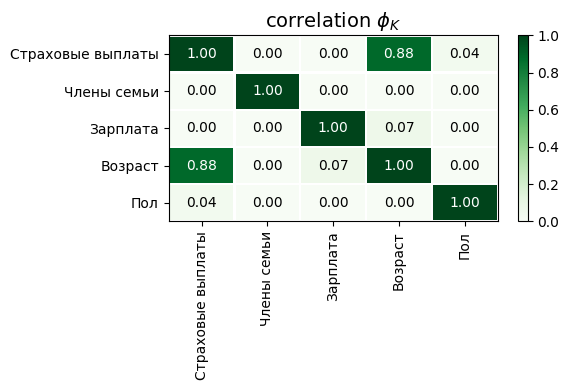

In [10]:


interval_cols = data.select_dtypes('number').columns.tolist()
phik_overview = data.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(6, 4))
plt.tight_layout()

Довольно значимая корреляция между возрастом и целевым признаком, предполагаю,что весовой коэффициент у данного признака в модели будет выше остальных.

## Умножение матриц

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Предсказания:

$
a' = XPw'
$

Формула обучения:

$
w' = ((XP)^T XP)^{-1} (XP)^T y = (P^TX^TXP)^{-1} P^TX^T y = (X^T XP)^{-1}(P^T)^{-1}P^TX^Ty = P^{-1}(X^TX)^{-1}EX^Ty = P^{-1}w
$

Тогда предсказания:
$
a' = XPw' = XPP^{-1}w = XEw = Xw
$

Получаем ,что предсказания до умножения и после равны:

$
a = a'
$

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> молодец, что не раскрыла $(X^T X)^{-1}$, так как для неквадратных матриц $X$ и $X^T$ обратных матриц не существует, но у матриц принципиален порядок множителей, поэтому при раскрытии скобок мы должны пользоваться следующими свойствами:
    
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправила
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Теперь верно =)
</div>

**Ответ:** Нет не изменится

**Обоснование:** как видно из расчетов, при умножении матрицы признаков на обратную, получим предсказания равные предсказаниям на исходной матрице.Поскольку для оценки качества в расчетах участвуют  целевые признаки, которые мы никоим образом не меняли, и предсказания, которые равны исходным, то и качество модели не меняется.

## Алгоритм преобразования



1. Создадим обратимую матрицу. Обязательным условием является совпадение в ней числа строк с числом столбцов в матрице признаков.Также матрица обратима только если является квадратной и ее детерминат не равен нулю.
2. Умножим матрицу признаков на созданную матрицу.Как показали вычисления в предыдущем пункте,это не повлияет на предсказания и следовательно на качество модели.

$$a' = XP P^{-1} w= Xw $$
$$a' = a $$




<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Нарушен порядок множителей
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Исправила
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Отлично =)
</div>

## Проверка алгоритма

In [9]:
# Разобьем данные на целевой признак и признаки
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


In [10]:
# Создадим обратимую матрицу размером 4 х 4 , так как в матрице признаков у нас 4 столбца
reversible_matrix = make_spd_matrix(n_dim=4, random_state=12345)
if np.linalg.det(reversible_matrix) != 0:
    print('Матрица обратима')
else:
    print('Матрица необратима')

Матрица обратима


In [11]:
reversible_matrix

array([[ 1.37245706, -1.03845957, -0.84389737, -0.26033015],
       [-1.03845957,  2.87886199,  1.67157893,  0.48470484],
       [-0.84389737,  1.67157893,  2.10204907,  0.3257384 ],
       [-0.26033015,  0.48470484,  0.3257384 ,  1.01695329]])

In [12]:
# Умножим признаки на созданную матрицу
reversible_features = features @ reversible_matrix
reversible_features.head()

,0,1,2,3
0,-41898.774254,83027.794274,104329.650450,16177.254178
1,-32116.129520,63652.911512,79955.083030,12401.372588
2,-17751.960092,35186.644426,44191.506259,6854.562847
3,-35212.848629,69766.266690,87691.200854,13595.504002
4,-22053.425761,43707.779622,54909.441040,8515.083654


Проверим возможность вернуться к исходным данным:

In [13]:
features_decrypted =reversible_features @ np.linalg.inv(reversible_matrix)
display(features.head())
display(features_decrypted.head())

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,5.955746e-12,46.0,38000.0,1.000000e+00
2,-9.965056e-13,29.0,21000.0,-1.430738e-12
3,-1.023961e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-2.136585e-12


<div class = "alert alert-info" style="border-left: 7px solid blue">
<b>Комментарий студента:</b>
Здравствуй дорогой ревьювер)))Сразу вопрос: я понимаю,что полученные вторично данные не окргулены и поэтому мы не имеем четких значений в столбцах 0 и 3.Это как-то можно исправить? Так же подскажи еще способы создания квадратных матриц(желательно из целых чисел),пробовала np.random.random(), но тут нет параметра state, чтоб зафиксировать выбор.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Незначительное отличие вызвано особенностью преобразования матриц и чисел с плавающей точкой, это норма. Исправить это можно с помощью .round(0).astype('int')
    
Вот здесь можно прочитать как зафиксировать рэндом стейт у матрицы https://stackoverflow.com/questions/45790873/how-to-use-np-random-seed-to-create-new-matrix-with-fixed-random-value =)
    
А вот как создавать матрицу с целыми числами https://www.geeksforgeeks.org/how-to-create-a-matrix-of-random-integers-in-python/
</div>

In [14]:
# Разделим таргет и фичи на тестовую и тренировочную выборки
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                    test_size=0.2, 
                                                    random_state=12345
                                                    )

In [15]:
print('Доля тестовой выборки:', target_test.shape[0] / target.shape[0])
print('Доля тренировочной выборки:', target_train.shape[0] / target.shape[0])

Доля тестовой выборки: 0.20012378791004745
Доля тренировочной выборки: 0.7998762120899525


In [16]:
reversible_features_train, reversible_features_test, reversible_target_train, reversible_target_test = train_test_split(reversible_features, target, 
                                                    test_size=0.2, 
                                                    random_state=12345
                                                    )

In [17]:
print('Доля тестовой преобразованной выборки:', reversible_features_test.shape[0] / reversible_features.shape[0])
print('Доля тренировочной преобразованной выборки:',reversible_features_train.shape[0] / reversible_features.shape[0])

Доля тестовой преобразованной выборки: 0.20012378791004745
Доля тренировочной преобразованной выборки: 0.7998762120899525


Сначала обучим модель на исходных данных.

In [18]:
model = LinearRegression()
model.fit(features_train,target_train)

predicted_train = model.predict(features_train)
r2_train = r2_score(target_train,predicted_train)

predicted_test = model.predict(features_test)
r2_test = r2_score(target_test,predicted_test)

print('Метирика R2 на тренировочной выборке:',r2_train)
print('Метирика R2 на тестовой выборке:',r2_test)

Метирика R2 на тренировочной выборке: 0.43334816364347417
Метирика R2 на тестовой выборке: 0.4160549216151198


In [19]:
weight = pd.DataFrame(model.coef_,index= features.columns, columns=['вес'])
print(weight.sort_values(by='вес',ascending=False))

                      вес
Возраст      3.646195e-02
Пол          1.525358e-02
Зарплата     1.796910e-07
Члены семьи -1.412857e-02


Как и предполагалось ранее, наибольший вес имеет признак возраст.

Обучим модель на преобразованных признаках.

In [20]:
model = LinearRegression()
model.fit(reversible_features_train,reversible_target_train)

reversible_predicted_train = model.predict(reversible_features_train)
reversible_r2_train = r2_score(reversible_target_train,reversible_predicted_train)

reversible_predicted_test = model.predict(reversible_features_test)
reversible_r2_test = r2_score(reversible_target_test,reversible_predicted_test)

print('Метирика R2 на тренировочной преобразованной выборке:',reversible_r2_train)
print('Метирика R2 на тестовой преобразованной выборке:',reversible_r2_test)

Метирика R2 на тренировочной преобразованной выборке: 0.43334816364350603
Метирика R2 на тестовой преобразованной выборке: 0.4160549216153018


In [21]:
weight_rev = pd.DataFrame(model.coef_,index= features.columns, columns=['вес'])
print(weight_rev.sort_values(by='вес',ascending=False))

                  вес
Возраст      0.031906
Пол          0.023730
Зарплата    -0.012919
Члены семьи -0.018888


И в данном случае тоже у признака возраст наибольший вес.

In [22]:
score_r2_df = pd.DataFrame(index=['исходный', 'преобразованный'])
score_r2_df['на тренировочном'] = [r2_train,reversible_r2_train]
score_r2_df['на тестовом'] = [r2_test,reversible_r2_test]
score_r2_df

,на тренировочном,на тестовом
исходный,0.433348,0.416055
преобразованный,0.433348,0.416055


**Вывод:** как видим, преобразование данных путем умножения на обратимую матрицу не влияет на качество предсказаний модели.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера👍:</b> Верно, таким образом в случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных, не особо потеряв в качестве модели. 
</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Спасибо тебе за проделанную работу, к сожалению, сейчас я не могу принять твой проект, поэтому придётся ещё немного поработать:
 
- разобраться с корреляцией;
- исправить ошибку в доказательстве.
    
До скорой встречи, если у тебя есть какие-то вопросы, то обязательно пиши =)
    
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера V.2👍:</b> Дополнительные материалы:

Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography

Небольшой обзор на Шифр Хилла: https://habr.com/ru/post/595281/
    
Ещё пара статей на эту тему:
    
-	https://medium.com/intuit-engineering/machine-learning-on-encrypted-data-no-longer-a-fantasy-58e37e9f31d7
-	https://towardsdatascience.com/cryptography-crash-course-for-the-intimidated-892b7889528a
-	https://towardsdatascience.com/homomorphic-encryption-machine-learning-new-business-models-2ba6a4f185d

   
Примеры использования линейной алгебры в машинном обучении:
https://machinelearningmastery.com/examples-of-linear-algebra-in-machine-learning/
    
Для чего нужна математика в машинном обучении?
https://proglib.io/p/dlya-chego-nuzhen-matematicheskiy-analiz-v-mashinnom-obuchenii-2021-02-15

Большая статья по векторам:
https://neptune.ai/blog/understanding-vectors-from-a-machine-learning-perspective  

Можно ещё дополнительно посмотреть лекции от МФТИ https://www.youtube.com/playlist?list=PLk4h7dmY2eYHHTyfLyrl7HmP-H3mMAW08
    
Классная серия роликов по линейной алгебре на английском (можно включить автоматические русские субтитры): https://www.youtube.com/playlist?list=PLRDl2inPrWQW1QSWhBU0ki-jq_uElkh2a


Удачи в будущих проектах и работе, всё обязательно получится!
</div>
